# Classification

## Partitioning models

### Trees

- Rekursiv af natur:
    - Hele data sættet starter i én knude / node
    - Et split vælges som bedst seperer klasserne
    - Knuderne undersøges om de skal splittes igen
    - Hvis ingen knuder skal splittes afslutter algoritmen

#### Visual intro to ML 
 - http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
 - http://www.r2d3.us/visual-intro-to-machine-learning-part-2/

### Fordele ved træ modeller
- Let tolkelige
- Kræver ikke antagelsen om statistisk normalitet eller linearitet
- Variable kan bruges mange gange i forskellige dele af træet
- Robust overfor outliers

###  Ulemper ved træ modeller
- Man skal være påpasselig med træstørrelsen:
    - Små træer: lav predictive power
    - Store træer: har det med at overfitte
- Kan være tunge på store data-sæt

## Matematisk formalisme

Tree-based models have commonality in their endeavor to partition the feature space in sub-regions, and asigning a coefficient for each sub-region. Formally this can be expressed as in by letting $ X=\{X_{1,:},...,X_{n,:}\} $ be the observations and $ \{X_{:,1},...,X_{:,p} \} $ the feature-vectors, $ R_1,..,R_m $ be the $ m $ subregions, constructed from orthogonal and parallel hyperplanes i.e $ R_m= \{ (x_1,...,x_p) \in \mathbb{R}^p | x_1\leq j_{m_1},x_1\geq i_{m_1}..., x_p\leq j_{m_p} \} $ rendering the sub-regions as hypercubes. A decision tree is then a function that assigns a value to a point $ X_{i,:} $ based on which hypercube it lies in

$$
\begin{equation*}
	T(X_{i,:}, \Theta) = \sum_j \gamma_j I(X_{i,:} \in R_j), \quad \Theta_j = \{\gamma_j,R_j\}
\end{equation*}
$$   
     

## Looking at these concepts in 

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">

In [21]:
import plotly.express as px
iris = px.data.iris()
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz, plot_tree
from sklearn import tree

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(iris.iloc[:,:4], iris.iloc[:,4])
r = export_text(decision_tree, feature_names=list(iris.columns)[:4])
print(r)

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- class: versicolor
|   |--- petal_width >  1.75
|   |   |--- class: virginica



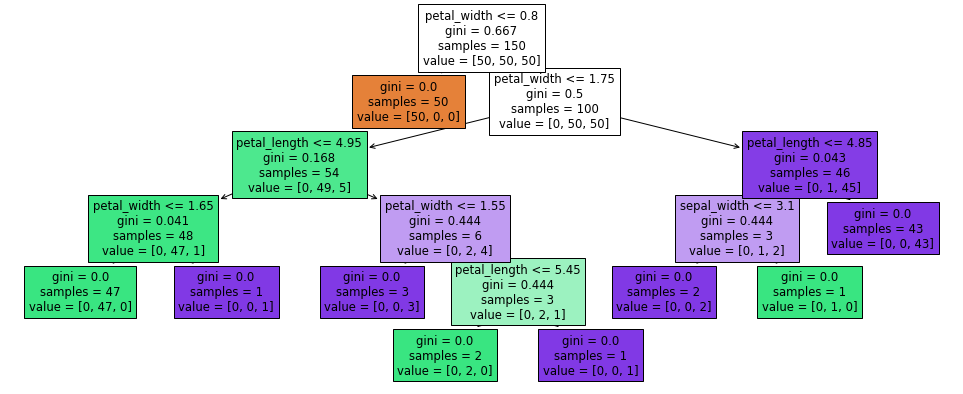

In [67]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(iris.iloc[:,:4], iris.iloc[:,4])
plt.figure(figsize=(17,7))
plot_tree(decision_tree, filled = True, feature_names=list(iris.columns)[:4])
plt.show()

## What is the mentioned `Gini`?

Gini impurity gives us some measure of the “trivial guessing accuracy” for a categorical dataset with an arbitrary discrete probability distribution on the categories.

$$
    \textit{Gini}: \mathit{Gini}(E) = 1 - \sum_{j=1}^{c}p_j^2
$$

### Sub-regions

The partitioning into sub-regions is done in a top-down manner, meaning that the feature space is divided into smaller and smaller hypercubes until a prespecified depth is reached. The splitting of a cube follows from the placement of a hyperplane which decides the size of each of the 2 sub-hyper-cubes
$$
\begin{equation*}
        R_1(j,s) =\{ x \in \mathbb{R}^p |x_j \leq s\}, \; \; R_2(j,s)= \{ x \in \mathbb{R}^p | x j > s \}
\end{equation*}
$$     

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris_numpy = load_iris()

def plt_boundaries():
    plt.figure(figsize=(12,5))

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris_numpy.data[:, pair]
        y = iris_numpy.target

        # Train
        clf = DecisionTreeClassifier().fit(X, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris_numpy.feature_names[pair[0]])
        plt.ylabel(iris_numpy.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_numpy.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

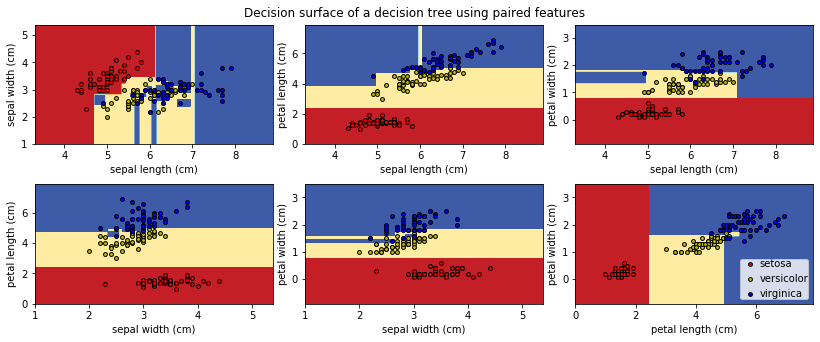

In [36]:
plt_boundaries()

### Random forest

Forsøg på at mindske correlationen ved at lade vælge features brugt til konstruktion af træerne at
random.

1. For $ b=1 $ til $ B $:
     - Lav et bootstrap datasæt, $ Z^{*} $, med tilbagelægning af samme størrelse som det originale datasæt.
	 - Lav et random forest træ ud fra $ Z^{*} $ ved at gøre følgende indtil hver slutknude er af størrelse $ n_{\text{min}} $:
        1. Vælg $ m $ variable tilfældigt fra de $ p $ feature variable.
		2. Vælg det bedste split blandt de $ m $ variable.
		3. Split knuden i to.
2. Gem den konstruerede følge af træer $ \{T_{b}\}_{b=1}^{B}$
3. Lav klassifikation ved brug af majority vote $\hat{G}_{\text{rf}}(x)=\arg\max_{k}\hat{f}_{\text{rf},k}(x) $.


> Breiman 2001 https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(iris.iloc[:,:4], iris.iloc[:,4])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Boosting

1. Initialisér vægte $ w_i=1/N $, $ i=1,...,N $
2. For $ m=1 $ til $M$
    1. Fit classifier $ G_m(x) $ til træningsdata, med vægtene $ w_i $
	2. Beregn
$$
\begin{equation*}
    \text{err}_m= \frac{\sum_{i=1}^{N}w_i I(y_i \neq G_m(x_i))  }{\sum_{i=1}^{N} w_i }
\end{equation*}
$$
    3. Beregn $ \alpha_m = \log\frac{1-\text{err}_m=}{\text{err}_m=} $
    4. set $ w_i \leftarrow w_i\cdot \exp[\alpha_m I(y_i\neq G_m(x_i))], \; i=1,..,N $ 


3. Output $ G(x) = \text{sign} \left[ \sum_{m=1}^{M} \alpha_mG_m(x) \right] $

Bemærk at hver prediktor tvinges til at korrekse forrige predictors fejl gennem step B+D. Og at hvis en predictor har mere end $ 50\% $ misklassifikations rate medtages denne med negativt fortegn pr. B+C.

In [77]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

clf.fit(iris.iloc[:,:4], iris.iloc[:,4])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

### XGboost

An improvement of gradint boosting which in turn is an improvement of adaboost

> source: https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [78]:
import xgboost as xgb
data, label = iris.iloc[:,:4], iris.iloc[:,5] -1
dtrain = xgb.DMatrix(data, label=label)
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', "num_class": 3, "silent":1}

num_round = 10
bst = xgb.train(param, dtrain)

## Measuring perfomance

### Simple accuracy

Accuracy classification score.


```python
from sklearn.metrics import accuracy_score

accuracy_score(y_true, prediction)
```
In our case that is

In [140]:
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(iris.iloc[:,:4], iris.iloc[:,4])

accuracy_score(iris.iloc[:,4], decision_tree.predict(iris.iloc[:,:4]))

0.96

### Confusion matrix

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[2] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

```python
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, prediction)
```

> source: https://en.wikipedia.org/wiki/Confusion_matrix

In [142]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(iris.iloc[:,4], decision_tree.predict(iris.iloc[:,:4]))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

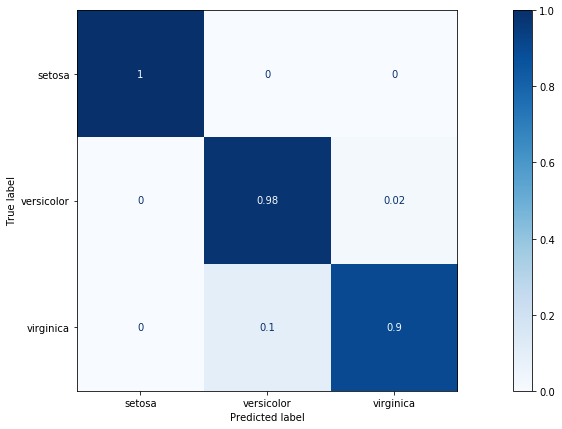

In [143]:
disp=plot_confusion_matrix(decision_tree,iris.iloc[:,:4], iris.iloc[:,4],
                      display_labels=iris.iloc[:,4].unique(),
                      cmap=plt.cm.Blues,
                      normalize="true")
disp.figure_.set_size_inches((20,7))

### Classification report

In [149]:
from sklearn.metrics import classification_report
truth = iris.iloc[:,4]
prediction = decision_tree.predict(iris.iloc[:,:4])
features = iris.iloc[:,4].unique()

print(classification_report(truth, prediction, target_names=features))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## Binary classification

### ROC curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

```python
from sklearn.metrics import roc_curve

test_score = model.predict_proba(test_X)[:,1]

fpr, tpr, _ = roc_curve(test_y, test_score)
```

The single most used metric for binary classification problems is the area under this curve. This is due to the fact that it does not simply look at the hard classifications of the classifier, but instead on the probability.

```python
from sklearn.metrics import roc_auc_score
auc_test = roc_auc_score(test_y, test_score)
```

>AUC can be seen as the expectation that a uniformly drawn instance of class 0 is ranked before a uniformly drawn
instance of class 1

> source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

We will use the titanic data set

> https://www.kaggle.com/c/titanic

In [231]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train = pd.read_csv("../data/titanic_train.csv")
target =  train.Survived
train = train.drop(["Survived",'PassengerId',"Name","Ticket","Cabin"], axis = 1)

train = pd.get_dummies(train)

train = train.fillna(train.mean())
           
train_X , test_X , train_y , test_y = train_test_split(train, target , train_size = .7 )

model = LogisticRegression(max_iter=1000)

model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
from sklearn.metrics import roc_auc_score, roc_curve
test_score = model.predict_proba(test_X)[:,1]
fpr, tpr, _ = roc_curve(test_y, test_score)
auc_test = roc_auc_score(test_y, test_score)

In [233]:
import plotly.graph_objects as go

fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    name='ROC curve (area = %0.2f)' % auc_test))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines',
                    name='Random guess'))

In [234]:
import xgboost as xgb

data, label = train_X, pd.DataFrame(train_y.values, columns=["survived"])
dtrain = xgb.DMatrix(data, label=label)

data1, label1 = test_X, pd.DataFrame(test_y.values, columns=["survived"])
dtest = xgb.DMatrix(data1, label=label1)

param = {'max_depth': 2, 'eta': 0.1, 'objective': 'binary:logistic', 'silent':1, 'verbose':0}
param['nthread'] = 4
metric = 'auc'#'error'
param['eval_metric'] = metric

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 100
evals_result = {}
bst = xgb.train(param, dtrain, num_round, evallist,  evals_result=evals_result, verbose_eval=False)

# https://github.com/dmlc/xgboost/blob/master/demo/guide-python/evals_result.py

In [235]:
import plotly.express as px
df = pd.DataFrame([evals_result["eval"][metric],evals_result["train"][metric]], index = ["test","train"]).T
df = df.reset_index().melt(id_vars = "index")

px.line(df, x="index", y="value", color = "variable", labels={"index":"Iteration", "value":metric})

### Why not just set iteration $\approx \infty $? 

### Exercise

Try to fit one of the classifiers from above to the diamond dataset and evaluate the performance with one of the methods from the section above

In [212]:
data = pd.read_csv("../data/diamonds.csv")

data.loc[:,"target"] = data.price > 4000
data.head()
target =  data.target
data = data.drop(['target','price'], axis = 1)

train_X , test_X , train_y , test_y = train_test_split(data, target , train_size = .7 )

### Appendix

### Plots as SVG

> source: https://github.com/parrt/dtreeviz

In [7]:
from dtreeviz.trees import dtreeviz
from IPython.display import SVG, display

v = dtreeviz(decision_tree, 
               iris.iloc[:,:4], iris.iloc[:,5],
               target_name='Species',
              feature_names=list(iris.columns)[:4], 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
v.view() 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


## Light GBM

- https://lightgbm.readthedocs.io/en/latest/Experiments.html
- https://github.com/Microsoft/LightGBM

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    res = {i: [] for i in feature_names} 
    def recurse(node, res, name=feature_name[0]):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            res[name].append("if {} <= {}:".format(name, threshold))
            recurse(tree_.children_left[node], res, name)
            res[name].append("else:  # if {} > {}".format(name, threshold))
            recurse(tree_.children_right[node], res, name)
        else:
            res[name].append("return {}".format(tree_.value[node]))

    recurse(0, res)
    return res

tree_to_code(decision_tree, list(iris.columns)[:4])

### Fast titanic

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

train = pd.read_csv("../data/titanic_train.csv")
test = pd.read_csv("../data/titanic_test.csv")

full = train.append(test, sort = True)
target = full.Survived
full = full.drop(['Survived', 'PassengerId',"Name","Ticket","Cabin"], axis = 1)

test = full[:891]
train = full[891:]

# convert categories to numeric values
full = pd.get_dummies(train)

# fill in missing data
# my_imputer = SimpleImputer()
# full = my_imputer.fit_transform(full)

train_X , test_X , train_y , test_y = train_test_split( full , train_y , train_size = .7 )


model = LogisticRegression()

model.fit(train_X, train_y)